## p411 

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
iris = load_iris()
irisDF = pd.DataFrame(iris.data,columns = ['sepal length','sepal width','petal length','petal width'])
irisDF.head(1)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2


In [5]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [6]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_

In [9]:
iris_result = irisDF.groupby(['target','cluster'])['sepal length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length, dtype: int64

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca_transformed = PCA(2).fit_transform(iris.data)
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(1)

,sepal length,sepal width,petal length,petal width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


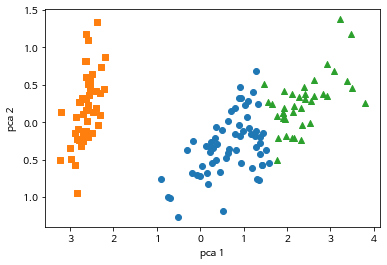

In [14]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.show()